Business challenge/requirement:

BigMart is one of the biggest retailer of Europe and has operations across multiple countries. You are a data analyst in IT team of BigMart. Invoice and SKU wise Sales Data for Year 2011 is shared with you. You need to prepare meaningful charts to show case the various sales trends for 2011 to top management.

Key issues:
Data should be displayed pictorially to capture the attention of top management

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\Courses\Edureka\dataset\BigMartSalesData.csv')

In [4]:
print(df.shape)
df.head()

(541874, 12)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


1. Plot Total Sales Per Month for Year 2011. How the total sales have increased over months in Year 2011. Which month has lowest Sales?

In [14]:
sales = df.groupby(['Month']).agg({'Quantity':np.sum}).reset_index()

In [16]:
sales.head(2)

,Month,Quantity
0,1,486463
1,2,295398


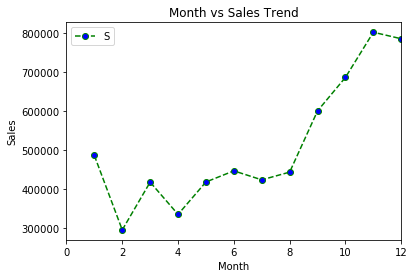

In [30]:
plt.plot(sales['Month'], sales['Quantity'], linestyle='dashed', color='g', marker='o', markerfacecolor='b')
plt.xlabel('Month')
plt.xlim([0,12])
plt.ylabel('Sales')
plt.title('Month vs Sales Trend')
plt.legend('Sales')
plt.show()

February (2nd month) is the lowest

2. Plot Total Sales Per Month for Year 2011 as Bar Chart. Is Bar Chart Better to visualize than Simple Plot?

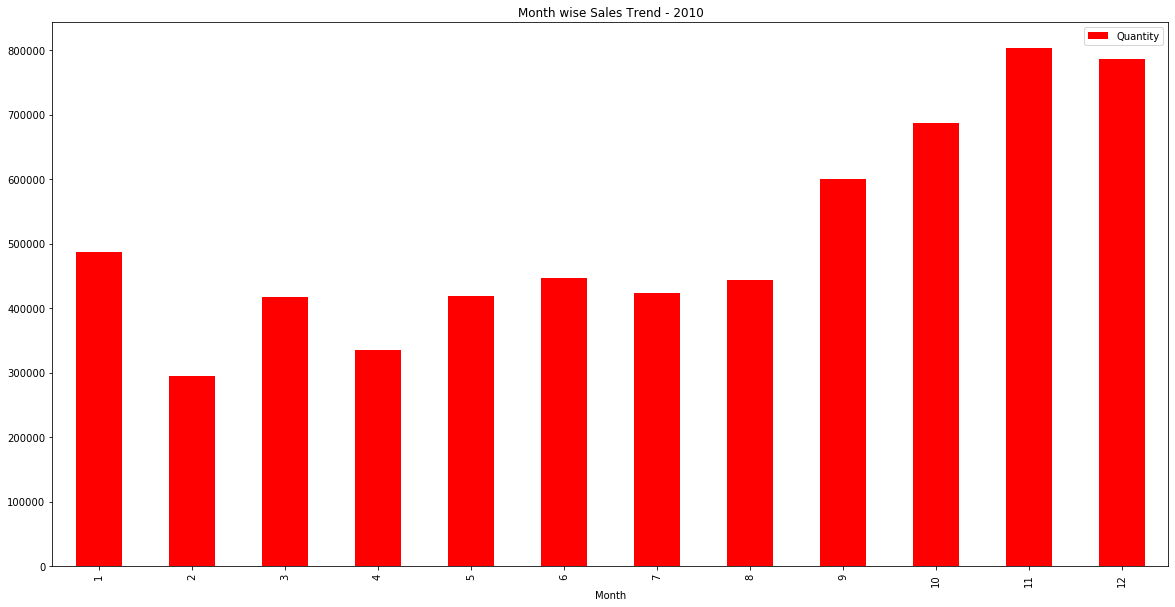

In [36]:
df.groupby(['Month']).agg({'Quantity':np.sum}).plot(kind='bar', figsize=(20,10), color='r', title='Month wise Sales Trend - 2010')
plt.show()

Bar plot looks better for this data visualization

3. Plot Pie Chart for Year 2011 Country Wise. Which Country contributes highest towards sales?

In [52]:
country_df = df.groupby(['Country']).agg({'Quantity':np.sum}).reset_index()
country_df.columns= ['Country', 'Sale_Count']
country_df.head(2)

,Country,Sale_Count
0,Australia,84765
1,Austria,4935


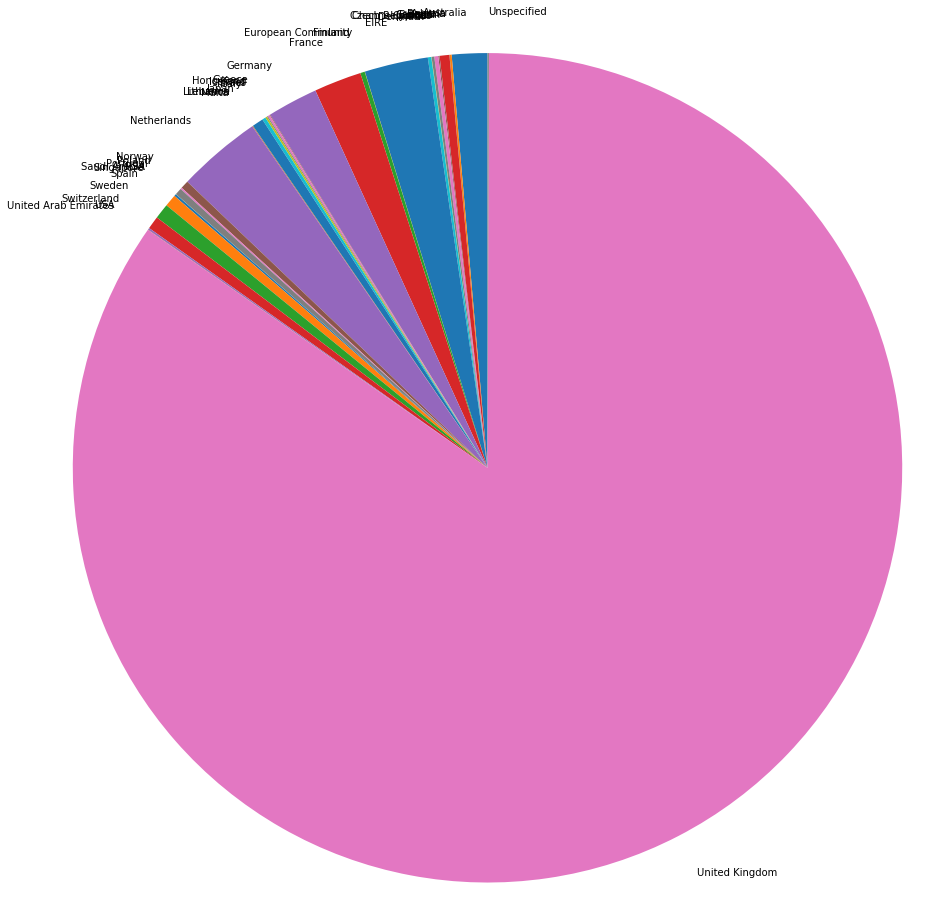

In [73]:
fig = plt.figure()
fig.set_size_inches(12,12)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(country_df['Sale_Count'], labels = country_df['Country'], startangle=90, radius=1.2)
plt.show()

heighest contributed country is UK

4. Plot Scatter Plot for the invoice amounts and see the concentration of amount. In which range most of the invoice amounts are concentrated

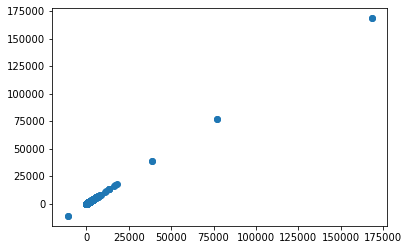

In [70]:
plt.scatter(df[['Amount']], df[['Amount']])
plt.show()

More invoices are in range 0 to 25000.

## Enhancements for code

1. Change the bar chart to show the value of bar

In [79]:
bar_df = df.groupby(['Month']).agg({'Quantity':np.sum}).reset_index()
bar_df.head(1)

,Month,Quantity
0,1,486463


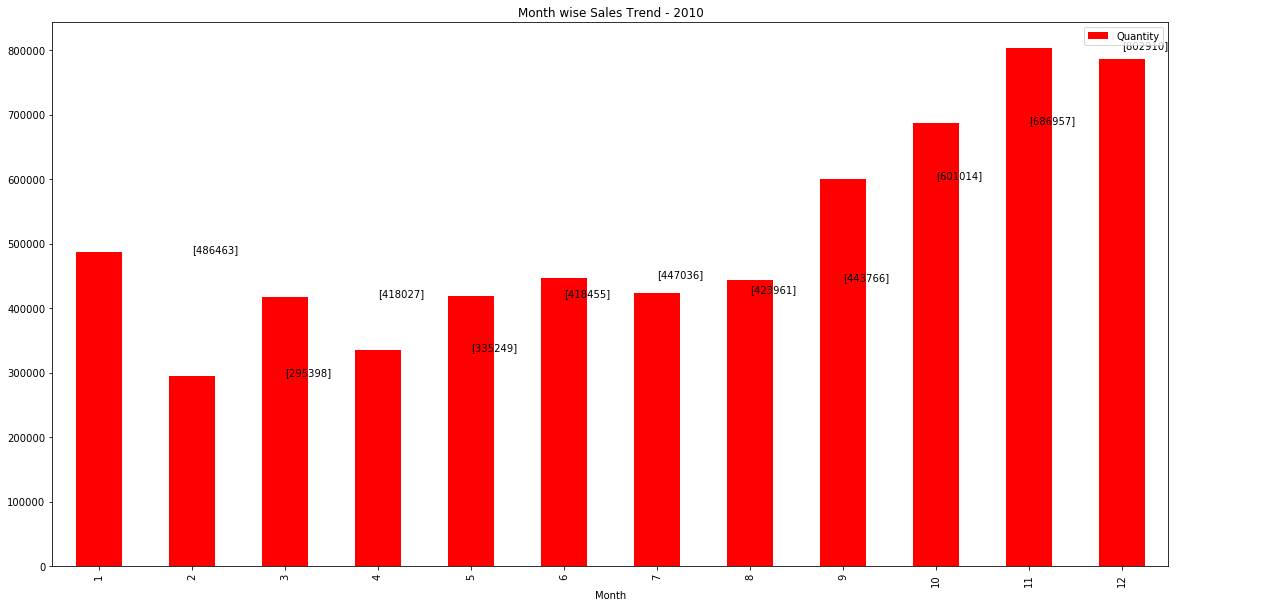

In [101]:
ax = bar_df.plot(x='Month', y='Quantity', kind='bar', figsize=(20,10), color='r', title='Month wise Sales Trend - 2010')

for i in range(len(bar_df)):
    ax.annotate(y[i], xy=(x[i],y[i]))

plt.show()

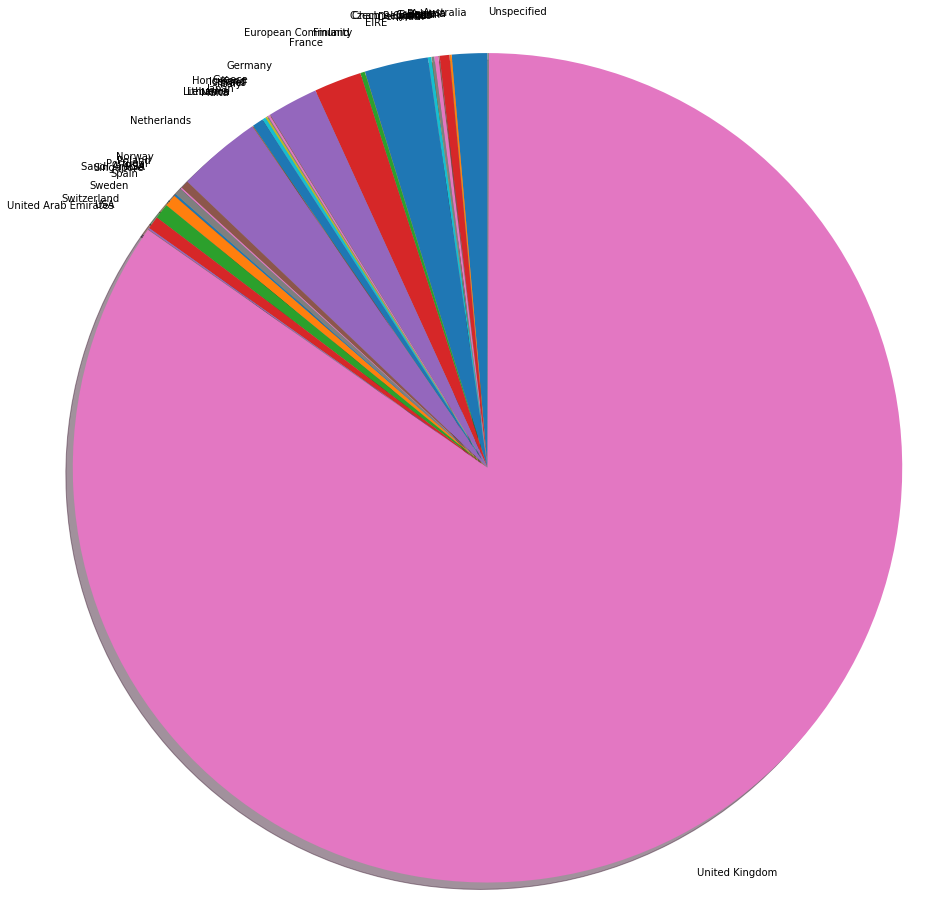

In [86]:
fig = plt.figure()
fig.set_size_inches(12,12)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(country_df['Sale_Count'], labels = country_df['Country'], startangle=90, radius=1.2, shadow=True)
plt.show()

3. In scatter plot change the color of Scatter Points

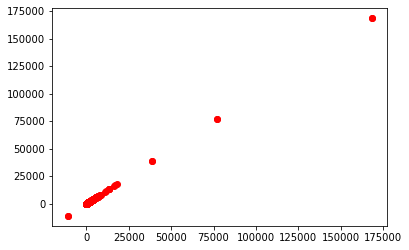

In [75]:
plt.scatter(df[['Amount']], df[['Amount']], color='r')
plt.show()